# Hear Disease Predictor

Cargamos los datos

In [1]:
import pandas as pd
ds_path = "data/heart_disease_train.csv"
df = pd.read_csv(ds_path)


In [2]:
df.head()

ID        age  sex  chest.pain.type  resting.bp.s  cholesterol  \
0   1  65.686292    1                3    126.893714   215.554443   
1   2  62.924402    1                4    113.693185     0.000000   
2   3  46.704774    1                1    121.400796   183.622255   
3   4  53.629913    1                4    116.884710     0.000000   
4   5  54.890007    1                4    155.011496   284.164758   

   fasting.blood.sugar  resting.ecg  max.heart.rate  exercise.angina  oldpeak  \
0                    0            2      143.154463                0      0.4   
1                    1            0       74.825992                1     -0.5   
2                    0            2      166.837456                0      1.9   
3                    0            0      121.063818                1      1.5   
4                    0            2      123.211739                1      0.6   

   ST.slope  target  
0         2       1  
1         2       1  
2         2       0  
3         2       1  
4         2       1

Exploramos los datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   952 non-null    int64  
 1   age                  952 non-null    float64
 2   sex                  952 non-null    int64  
 3   chest.pain.type      952 non-null    int64  
 4   resting.bp.s         952 non-null    float64
 5   cholesterol          952 non-null    float64
 6   fasting.blood.sugar  952 non-null    int64  
 7   resting.ecg          952 non-null    int64  
 8   max.heart.rate       952 non-null    float64
 9   exercise.angina      952 non-null    int64  
 10  oldpeak              952 non-null    float64
 11  ST.slope             952 non-null    int64  
 12  target               952 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 96.8 KB


Se observan tipos de datos que pueden ser ajustados

Observamos los valores unicos de las variables categóricas

In [4]:
from utils import convert_bolean_columns
convert_bolean_columns(df)
df["sex"] = df["sex"].astype("category")
df['sex'] = df['sex'].map({0: 'male', 1: 'female'})
df["chest.pain.type"] = df["chest.pain.type"].astype("category")
df['chest.pain.type'] = df['chest.pain.type'].map({1: 'typical angina', 2: 'atypical angina', 3: 'non-anginal pain', 4: 'asymptomatic'})
from utils import get_categoric_columns
categoric_columns = get_categoric_columns(df)
for i in categoric_columns:
    print(i)
    print(df[i].unique())

sex
['female', 'male']
Categories (2, object): ['male', 'female']
chest.pain.type
['non-anginal pain', 'asymptomatic', 'typical angina', 'atypical angina']
Categories (4, object): ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   952 non-null    int64   
 1   age                  952 non-null    float64 
 2   sex                  952 non-null    category
 3   chest.pain.type      952 non-null    category
 4   resting.bp.s         952 non-null    float64 
 5   cholesterol          952 non-null    float64 
 6   fasting.blood.sugar  952 non-null    bool    
 7   resting.ecg          952 non-null    int64   
 8   max.heart.rate       952 non-null    float64 
 9   exercise.angina      952 non-null    bool    
 10  oldpeak              952 non-null    float64 
 11  ST.slope             952 non-null    int64   
 12  target               952 non-null    bool    
dtypes: bool(3), category(2), float64(5), int64(3)
memory usage: 64.6 KB


Aunque es inusual tener la columna edad cómo float, lo manetenemos así, para no perder información

Continuamos con la exploración de los datos

Visualizamos la cabecera, luego las últimas entradas

In [6]:
df.tail(10)

ID        age     sex   chest.pain.type  resting.bp.s  cholesterol  \
942  943  60.696948    male      asymptomatic    124.005244   205.795835   
943  944  38.536281  female   atypical angina    124.633883   322.001798   
944  945  53.484534  female   atypical angina    110.016186   230.115323   
945  946  46.834501  female   atypical angina    114.207768   230.009855   
946  947  39.294553  female  non-anginal pain    158.991154   155.939472   
947  948  43.202352  female      asymptomatic    121.106107   255.738679   
948  949  60.936593  female      asymptomatic    129.854673   257.721071   
949  950  60.096607  female      asymptomatic    135.749392   185.676247   
950  951  52.375502  female      asymptomatic    157.992820   337.985085   
951  952  57.164158  female      asymptomatic    140.918230   295.005423   

     fasting.blood.sugar  resting.ecg  max.heart.rate  exercise.angina  \
942                False            0      173.318447            False   
943                False            2      179.371484            False   
944                False            0      165.559323            False   
945                False            0      182.967479            False   
946                False            0      146.420826            False   
947                False            0      112.586409            False   
948                 True            2      142.542752             True   
949                False            0      169.679285             True   
950                False            0       82.952302             True   
951                False            0      111.143427             True   

     oldpeak  ST.slope  target  
942      0.0         1   False  
943      0.0         1   False  
944      1.0         3    True  
945      1.0         3    True  
946      0.0         1   False  
947      2.0         2    True  
948      0.0         1    True  
949      0.0         1    True  
950      2.5         2    True  
951      4.2         2    True

Verificamos los valores descriptivos

In [7]:
df.describe().T

count        mean         std        min         25%  \
ID              952.0  476.500000  274.963028   1.000000  238.750000   
age             952.0   54.025861    9.846800  25.760059   47.710891   
resting.bp.s    952.0  132.039039   18.954234   0.000000  119.888401   
cholesterol     952.0  208.949319   97.121300   0.000000  192.472305   
resting.ecg     952.0    0.713235    0.872957   0.000000    0.000000   
max.heart.rate  952.0  139.567426   27.436312  57.565330  119.668837   
oldpeak         952.0    0.934559    1.109046  -2.600000    0.000000   
ST.slope        952.0    1.650210    0.617413   1.000000    1.000000   

                       50%         75%         max  
ID              476.500000  714.250000  952.000000  
age              54.619793   60.675119   88.750887  
resting.bp.s    130.280023  142.740252  200.689910  
cholesterol     229.937612  266.425060  533.644516  
resting.ecg       0.000000    2.000000    2.000000  
max.heart.rate  141.495805  159.906661  202.226598  
oldpeak           0.650000    1.500000    6.200000  
ST.slope          2.000000    2.000000    3.000000

In [8]:
df.describe(include='category').T

count unique           top freq
sex               952      2        female  710
chest.pain.type   952      4  asymptomatic  507

In [9]:
df.describe(include='boolean').T

count unique    top freq
fasting.blood.sugar   952      2  False  748
exercise.angina       952      2  False  558
target                952      2   True  504

## Identificación de valores nulos y outliers

Buscamos duplicados

In [10]:
duplicated = df.duplicated().sum()
print(f"Registros duplicados en df: {duplicated}")

Registros duplicados en df: 0


No existen valores duplicados

Ahora valores nulos

In [11]:
from utils import get_nulll_data_info
get_nulll_data_info(df)

datos sin NAs en q  Na en q  Na en %
ID                                  952        0      0.0
age                                 952        0      0.0
sex                                 952        0      0.0
chest.pain.type                     952        0      0.0
resting.bp.s                        952        0      0.0
cholesterol                         952        0      0.0
fasting.blood.sugar                 952        0      0.0
resting.ecg                         952        0      0.0
max.heart.rate                      952        0      0.0
exercise.angina                     952        0      0.0
oldpeak                             952        0      0.0
ST.slope                            952        0      0.0
target                              952        0      0.0

No existen valores nulos

Ahora verificamos los outliers

In [12]:
from utils import get_outliers_data
get_outliers_data(df)

ID        age  resting.bp.s  cholesterol  resting.ecg  \
N° Outliers     0.0   6.000000     27.000000   155.000000          0.0   
% Outliers      0.0   0.630252      2.836134    16.281513          0.0   
Lim. mix     -474.5  28.264551     85.610624    81.543173         -3.0   
Lim. max     1427.5  80.121459    177.018029   377.354192          5.0   

             max.heart.rate   oldpeak  ST.slope  
N° Outliers        1.000000  25.00000       0.0  
% Outliers         0.105042   2.62605       0.0  
Lim. mix          59.312101  -2.25000      -0.5  
Lim. max         220.263397   3.75000       3.5

Visualizamos las gráficas de cajas de nuestras columnas

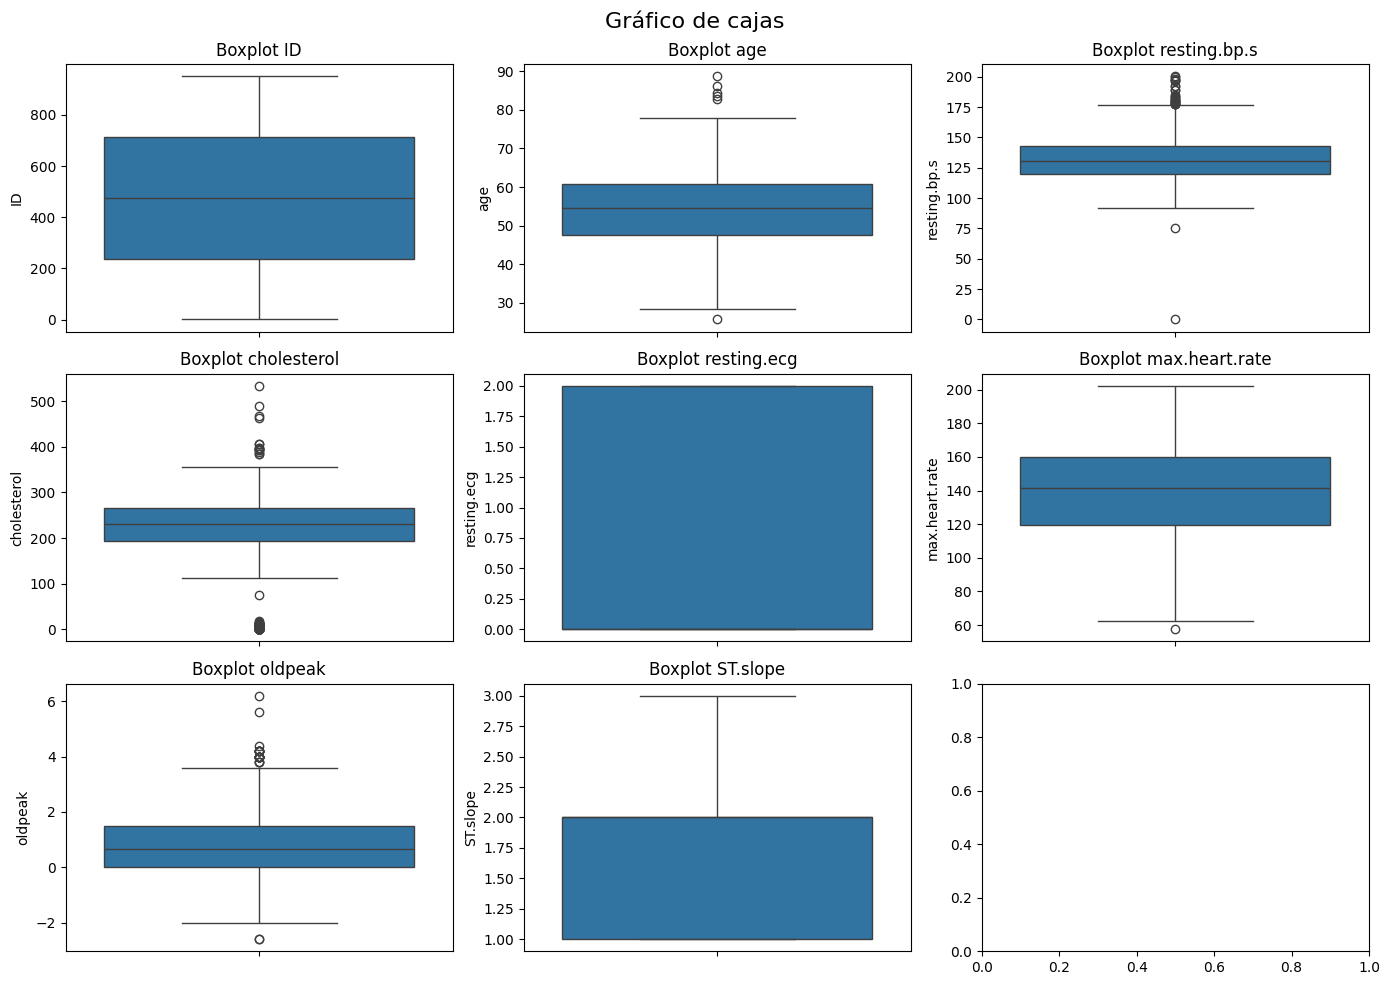

In [13]:
from utils import graph_boxplot, get_numeric_columns
graph_boxplot(df, columns=get_numeric_columns(df))

Observamos outliers en las columnas edad, Colesterol, presión sanguínea en reposo, Pico de depresión del segmento ST

En el Pico de depresión del segmento ST se observa valores de elevación, lo cual es posible

Ahora veremos las caracteristicas descriptivas de las variables númericas

In [14]:
df.describe()

ID         age  resting.bp.s  cholesterol  resting.ecg  \
count  952.000000  952.000000    952.000000   952.000000   952.000000   
mean   476.500000   54.025861    132.039039   208.949319     0.713235   
std    274.963028    9.846800     18.954234    97.121300     0.872957   
min      1.000000   25.760059      0.000000     0.000000     0.000000   
25%    238.750000   47.710891    119.888401   192.472305     0.000000   
50%    476.500000   54.619793    130.280023   229.937612     0.000000   
75%    714.250000   60.675119    142.740252   266.425060     2.000000   
max    952.000000   88.750887    200.689910   533.644516     2.000000   

       max.heart.rate     oldpeak    ST.slope  
count      952.000000  952.000000  952.000000  
mean       139.567426    0.934559    1.650210  
std         27.436312    1.109046    0.617413  
min         57.565330   -2.600000    1.000000  
25%        119.668837    0.000000    1.000000  
50%        141.495805    0.650000    2.000000  
75%        159.906661    1.500000    2.000000  
max        202.226598    6.200000    3.000000

In [15]:
from utils import get_descriptive_statistics
get_descriptive_statistics(df)

ID        age  resting.bp.s  cholesterol  \
min                      1.000000  25.760059      0.000000     0.000000   
max                    952.000000  88.750887    200.689910   533.644516   
mean                   476.500000  54.025861    132.039039   208.949319   
std                    274.963028   9.846800     18.954234    97.121300   
median                 476.500000  54.619793    130.280023   229.937612   
variation_coefficient    0.577047   0.182261      0.143550     0.464808   

                       resting.ecg  max.heart.rate   oldpeak  ST.slope  
min                       0.000000       57.565330 -2.600000  1.000000  
max                       2.000000      202.226598  6.200000  3.000000  
mean                      0.713235      139.567426  0.934559  1.650210  
std                       0.872957       27.436312  1.109046  0.617413  
median                    0.000000      141.495805  0.650000  2.000000  
variation_coefficient     1.223940        0.196581  1.186705  0.374142

No utilizaremos la columna Load ID ya que es solo un identificador

In [16]:
df.drop("ID", axis=1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  952 non-null    float64 
 1   sex                  952 non-null    category
 2   chest.pain.type      952 non-null    category
 3   resting.bp.s         952 non-null    float64 
 4   cholesterol          952 non-null    float64 
 5   fasting.blood.sugar  952 non-null    bool    
 6   resting.ecg          952 non-null    int64   
 7   max.heart.rate       952 non-null    float64 
 8   exercise.angina      952 non-null    bool    
 9   oldpeak              952 non-null    float64 
 10  ST.slope             952 non-null    int64   
 11  target               952 non-null    bool    
dtypes: bool(3), category(2), float64(5), int64(2)
memory usage: 57.2 KB


Ahora visualizaremos los histogramas de las diferentes columnas numéricas para entender mejor la distribución

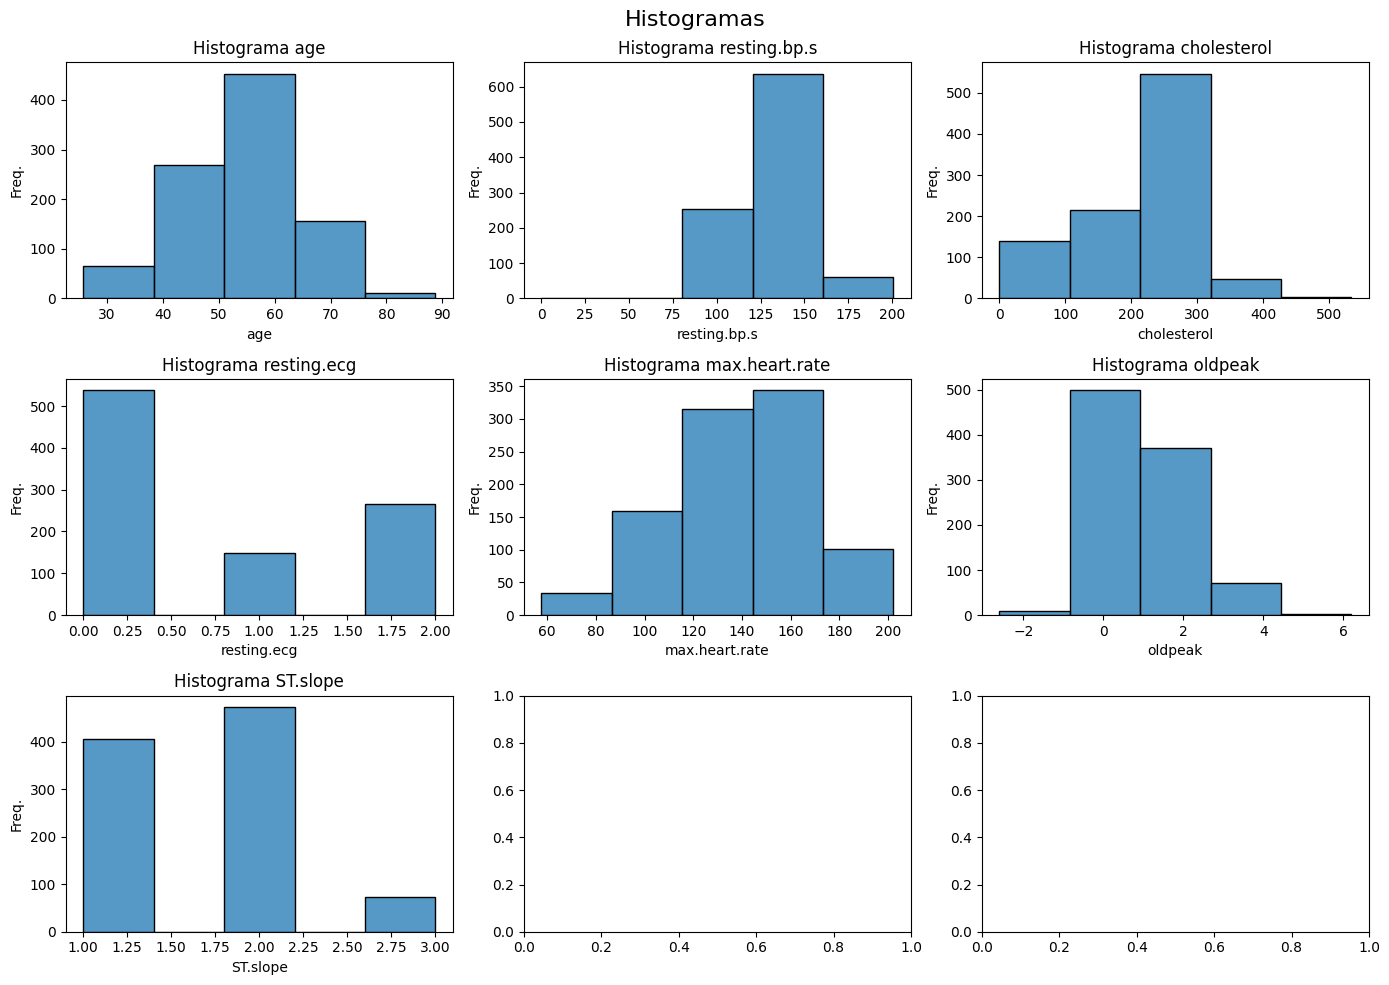

In [18]:
from utils import graph_histogram
graph_histogram(df, get_numeric_columns(df))

No se observa nada fuera de lo normal en las distribuciones

Se aprecia que la columna max.heart.rate posee una distribución normal, así como la columna edad, oldpeak, colesterol y ST.slope

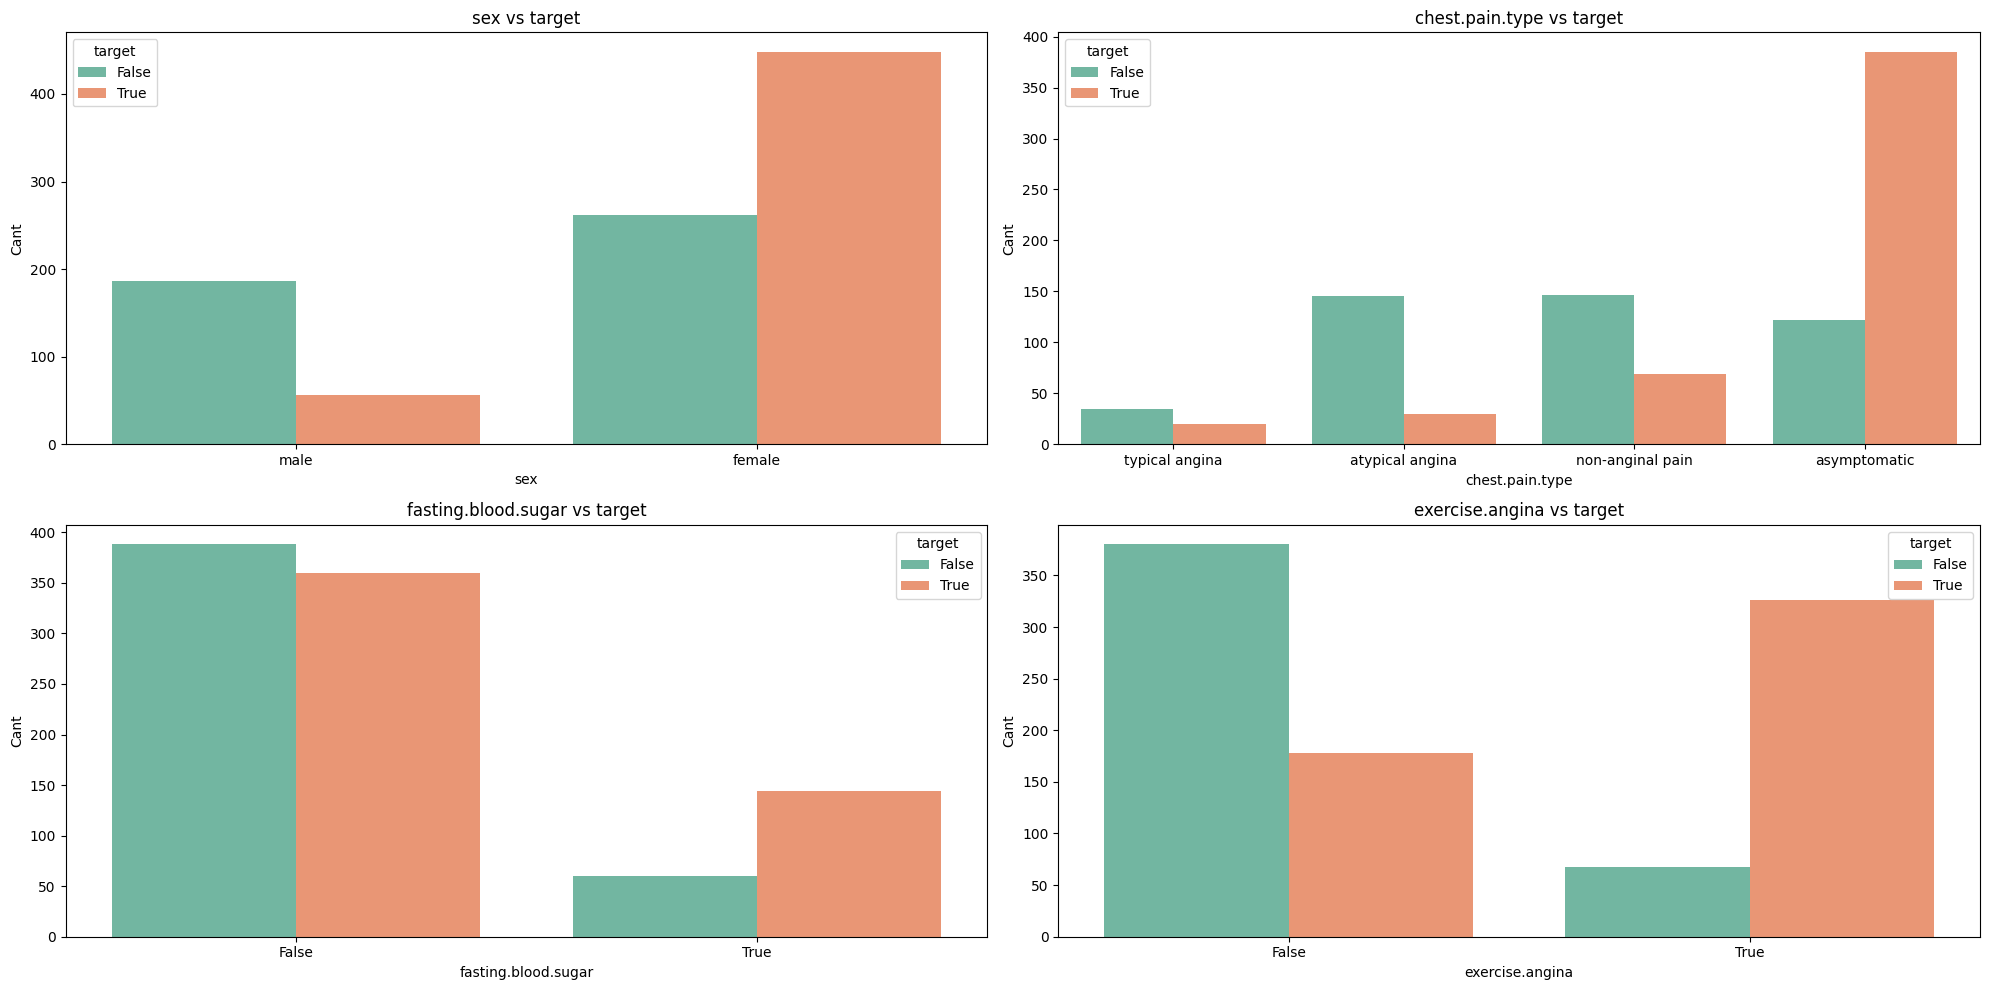

In [19]:
from utils import graph_barplot
graph_barplot(df, ["sex", "chest.pain.type", "fasting.blood.sugar", "exercise.angina"],'target', num_columns=2, figsize=(20,10))

Observamos que tenemos datos desbalanceados para las columnas

Veremos las correlaciones entre las caracteristicas

In [20]:
from utils import get_numeric_columns
numeric_columns = get_numeric_columns(df)
corr_matrix = df[numeric_columns].corr(method="pearson")
spearmann = df[numeric_columns].corr(method="spearman")
kendall = df[numeric_columns].corr(method="kendall")
corr_matrix

age  resting.bp.s  cholesterol  resting.ecg  \
age             1.000000      0.241398    -0.016833     0.142301   
resting.bp.s    0.241398      1.000000     0.147329     0.132040   
cholesterol    -0.016833      0.147329     1.000000     0.149963   
resting.ecg     0.142301      0.132040     0.149963     1.000000   
max.heart.rate -0.337464     -0.140759     0.223616     0.068108   
oldpeak         0.202277      0.215807     0.073801     0.075088   
ST.slope        0.207392      0.117522    -0.114438     0.024401   

                max.heart.rate   oldpeak  ST.slope  
age                  -0.337464  0.202277  0.207392  
resting.bp.s         -0.140759  0.215807  0.117522  
cholesterol           0.223616  0.073801 -0.114438  
resting.ecg           0.068108  0.075088  0.024401  
max.heart.rate        1.000000 -0.146479 -0.278527  
oldpeak              -0.146479  1.000000  0.513076  
ST.slope             -0.278527  0.513076  1.000000

Ahora graficamos el mapa de calor de las correlaciones

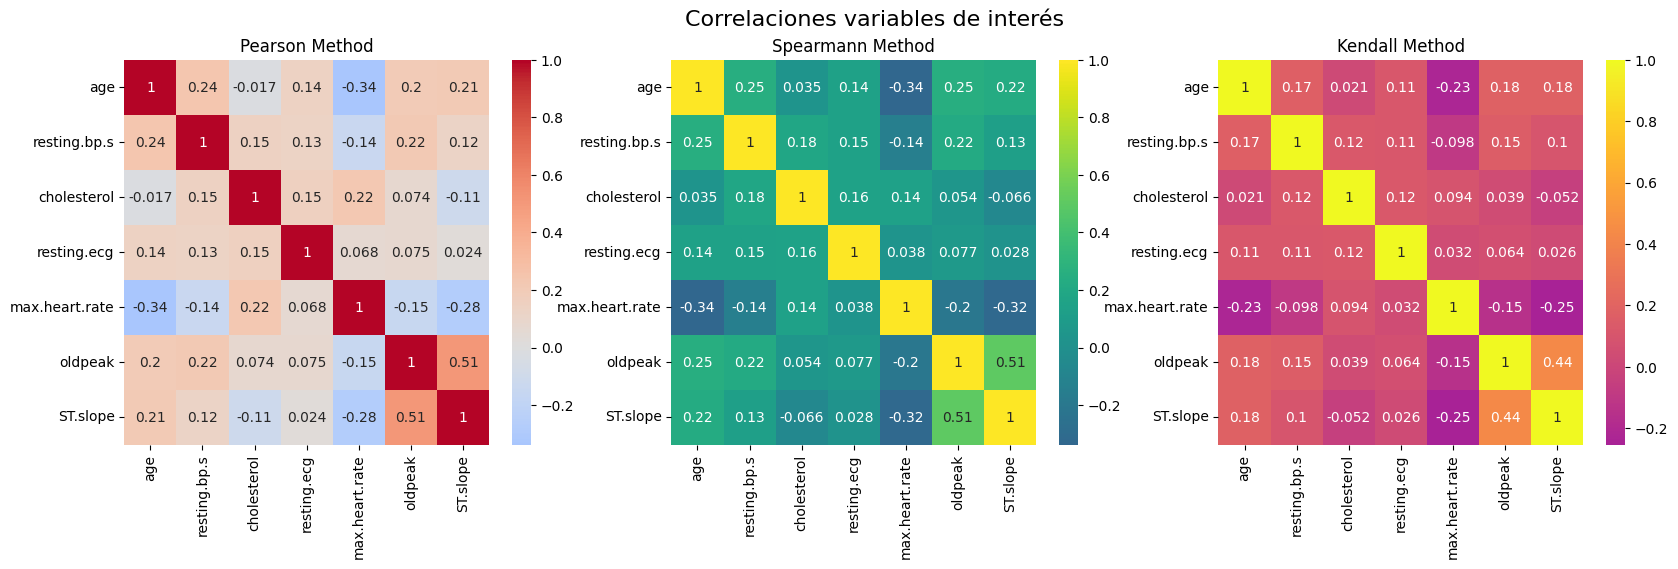

In [21]:
from utils import graph_correlations
graph_correlations(corr_matrix, spearmann, kendall, "Correlaciones variables de interés", figsize= (20,5))

Observamos correlaciones entre:
- oldpeak y ST.slope

también ligeras correlaciones entre:
- max.heart.rate cholesterol
- age y ST.slope
- resting.bp.s y age

Ahora observaremos la dispersión entre las variables

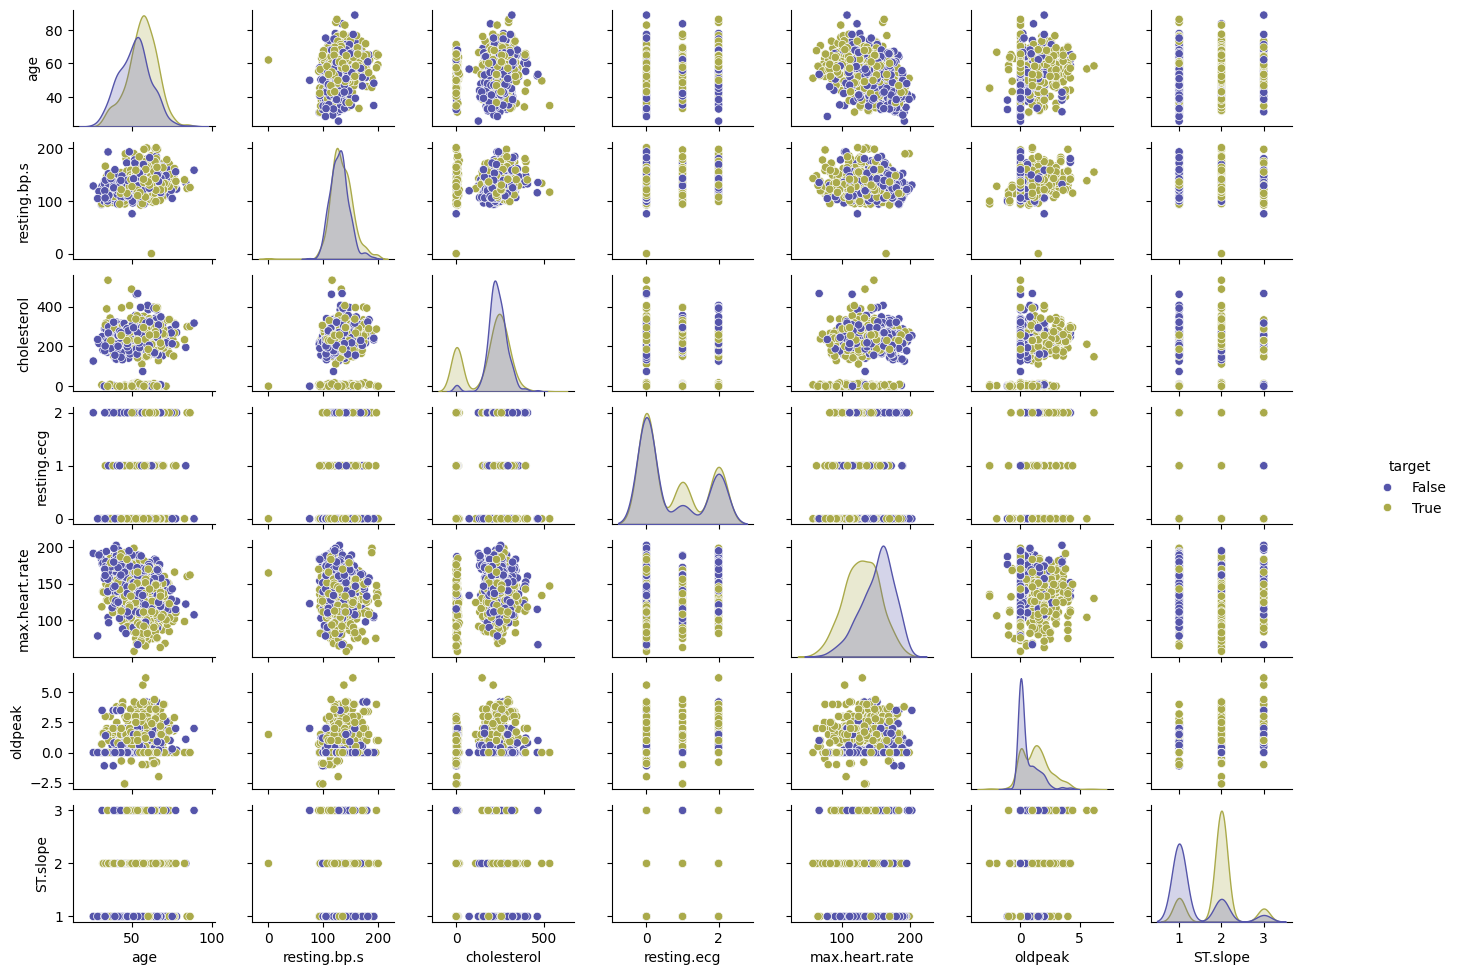

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_columns = get_numeric_columns(df)
palette = sns.color_palette("gist_stern", n_colors=2)
g = sns.pairplot(df[[*numeric_columns] + ["target"]], hue='target', height=1.2, diag_kind = 'kde', palette=palette)
g.figure.set_size_inches(15, 10)
plt.show()

Iniciamos la preparación de datos

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  952 non-null    float64 
 1   sex                  952 non-null    category
 2   chest.pain.type      952 non-null    category
 3   resting.bp.s         952 non-null    float64 
 4   cholesterol          952 non-null    float64 
 5   fasting.blood.sugar  952 non-null    bool    
 6   resting.ecg          952 non-null    int64   
 7   max.heart.rate       952 non-null    float64 
 8   exercise.angina      952 non-null    bool    
 9   oldpeak              952 non-null    float64 
 10  ST.slope             952 non-null    int64   
 11  target               952 non-null    bool    
dtypes: bool(3), category(2), float64(5), int64(2)
memory usage: 57.2 KB


In [24]:
predict_numeric = [
    'age',
    'resting.bp.s',
    'cholesterol',
    'resting.ecg',
    'max.heart.rate',
    'oldpeak',
    'ST.slope'
]

predict_categoric = [
    "sex",
    "chest.pain.type",
]

predict_boolean = [
    "fasting.blood.sugar",
    "exercise.angina",
]

output = "target"


X = df[[*predict_numeric] + [*predict_categoric] + [*predict_boolean]]
y = df[output]

Preparamos el preprocesador y asignamos el Encoder OneHOT

In [25]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
scaler = Pipeline(steps=[
    ("scaler", StandardScaler())
])
onehot = Pipeline(steps=[
("onehot", OneHotEncoder(handle_unknown='ignore', sparse_output=False))])
preprocessor = ColumnTransformer(
    transformers=[
        (
            "scaler",
            scaler,
            predict_numeric,
        ),
        (
            "onehot",
            onehot,
            predict_categoric + predict_boolean,
        ),
    ],
    remainder="passthrough"
)

Dividimos el dataset en 70% para entrenamiento, 30% para pruebas

In [26]:
X_transf = preprocessor.fit_transform(X)

df_transf = pd.DataFrame(X_transf, columns=preprocessor.get_feature_names_out())

df_transf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   scaler__age                               952 non-null    float64
 1   scaler__resting.bp.s                      952 non-null    float64
 2   scaler__cholesterol                       952 non-null    float64
 3   scaler__resting.ecg                       952 non-null    float64
 4   scaler__max.heart.rate                    952 non-null    float64
 5   scaler__oldpeak                           952 non-null    float64
 6   scaler__ST.slope                          952 non-null    float64
 7   onehot__sex_female                        952 non-null    float64
 8   onehot__sex_male                          952 non-null    float64
 9   onehot__chest.pain.type_asymptomatic      952 non-null    float64
 10  onehot__chest.pain.type_atypical angin

In [27]:
get_nulll_data_info(df_transf)

datos sin NAs en q  Na en q  Na en %
scaler__age                                              952        0      0.0
scaler__resting.bp.s                                     952        0      0.0
scaler__cholesterol                                      952        0      0.0
scaler__resting.ecg                                      952        0      0.0
scaler__max.heart.rate                                   952        0      0.0
scaler__oldpeak                                          952        0      0.0
scaler__ST.slope                                         952        0      0.0
onehot__sex_female                                       952        0      0.0
onehot__sex_male                                         952        0      0.0
onehot__chest.pain.type_asymptomatic                     952        0      0.0
onehot__chest.pain.type_atypical angina                  952        0      0.0
onehot__chest.pain.type_non-anginal pain                 952        0      0.0
onehot__chest.pain.type_typical angina                   952        0      0.0
onehot__fasting.blood.sugar_False                        952        0      0.0
onehot__fasting.blood.sugar_True                         952        0      0.0
onehot__exercise.angina_False                            952        0      0.0
onehot__exercise.angina_True                             952        0      0.0

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

In [29]:
del X_transf
del df_transf


## Creamos y entrenamos los modelos

### LGBM

Entrenamos el modelo

In [30]:
import lightgbm as lgb

pipeline_lgbm = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", lgb.LGBMClassifier(random_state=42))
])

pipeline_lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 357, number of negative: 309
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 954
[LightGBM] [Info] Number of data points in the train set: 666, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.536036 -> initscore=0.144395
[LightGBM] [Info] Start training from score 0.144395
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'resting.bp.s',
                                                   'cholesterol', 'resting.ecg',
                                                   'max.heart.rate', 'oldpeak',
                                                   'ST.slope']),
                                                 ('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['sex', 'chest.pain.type',
                                                   'fasting.blood.sugar',
                                                   'exercise.angina'])])),
                ('model', LGBMClassifier(random_state=42))])

### KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

pipeline_knn = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', knn)
    ]
)

pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'resting.bp.s',
                                                   'cholesterol', 'resting.ecg',
                                                   'max.heart.rate', 'oldpeak',
                                                   'ST.slope']),
                                                 ('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['sex', 'chest.pain.type',
                                                   'fasting.blood.sugar',
                                                   'exercise.angina'])])),
                ('model', KNeighborsClassifier())])

### Linear Regression

In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(
    penalty='l2',           # Tipo de regularización L2 (Ridge)
    C=1.0,                   # Inverso de la fuerza de regularización
    solver='lbfgs',          # Algoritmo para la optimización
    max_iter=100,            # Número máximo de iteraciones
    tol=1e-4,                # Tolerancia para el criterio de parada
    random_state=42, # Semilla para la reproducibilidad
)

pipeline_lr = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', lr)
    ]
)

pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'resting.bp.s',
                                                   'cholesterol', 'resting.ecg',
                                                   'max.heart.rate', 'oldpeak',
                                                   'ST.slope']),
                                                 ('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['sex', 'chest.pain.type',
                                                   'fasting.blood.sugar',
                                                   'exercise.angina'])])),
                ('model', LogisticRegression(random_state=42))])

### Árbol de decisiones

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

pipeline_dt = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', dt)
    ]
)

pipeline_dt.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'resting.bp.s',
                                                   'cholesterol', 'resting.ecg',
                                                   'max.heart.rate', 'oldpeak',
                                                   'ST.slope']),
                                                 ('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['sex', 'chest.pain.type',
                                                   'fasting.blood.sugar',
                                                   'exercise.angina'])])),
                ('model', DecisionTreeClassifier(random_state=42))])

### XBoost

In [34]:
import xgboost as xgb
from sklearn.pipeline import Pipeline

pipeline_xb = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", xgb.XGBClassifier(eval_metric='logloss', random_state=42))
])

pipeline_xb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'resting.bp.s',
                                                   'cholesterol', 'resting.ecg',
                                                   'max.heart.rate', 'oldpeak',
                                                   'ST.slope']),
                                                 ('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['sex', 'chest.pain...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

## Evaluamos los modelos

### LGBM

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred_lgbm = pipeline_lgbm.predict(X_test)

classification_report_lgbm = classification_report(y_test, y_pred_lgbm)
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
print("Repote Clasificación LGBM")
print(classification_report_lgbm)


Repote Clasificación LGBM
              precision    recall  f1-score   support

       False       0.92      0.86      0.89       139
        True       0.87      0.93      0.90       147

    accuracy                           0.90       286
   macro avg       0.90      0.89      0.89       286
weighted avg       0.90      0.90      0.89       286



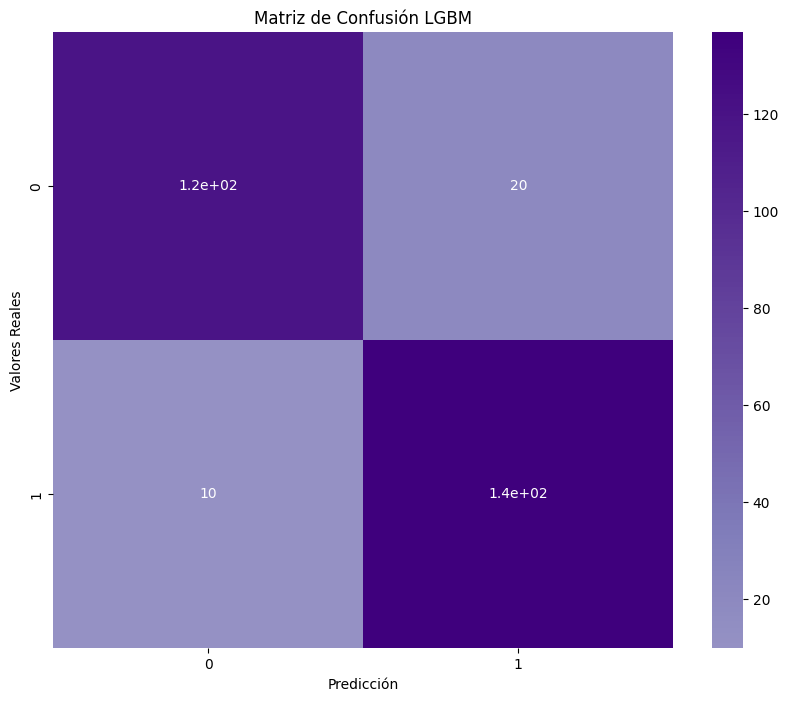

In [36]:
_, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
sns.heatmap(
    conf_matrix_lgbm,
    annot=True,
    cmap='Purples',
    center=0,
    ax=ax1,
)

ax1.set_xlabel("Predicción")
ax1.set_ylabel("Valores Reales")
ax1.set_xticks(ticks=ax1.get_xticks())
ax1.set_yticks(ticks=ax1.get_yticks())
plt.title("Matriz de Confusión LGBM")
plt.show()

Se observa que el modelo es bueno para detectar positivos y negativos

### KNN

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred_knn = pipeline_knn.predict(X_test)

classification_report_knn = classification_report(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Repote Clasificación knn")
print(classification_report_knn)

Repote Clasificación knn
              precision    recall  f1-score   support

       False       0.90      0.78      0.84       139
        True       0.82      0.92      0.87       147

    accuracy                           0.85       286
   macro avg       0.86      0.85      0.85       286
weighted avg       0.86      0.85      0.85       286



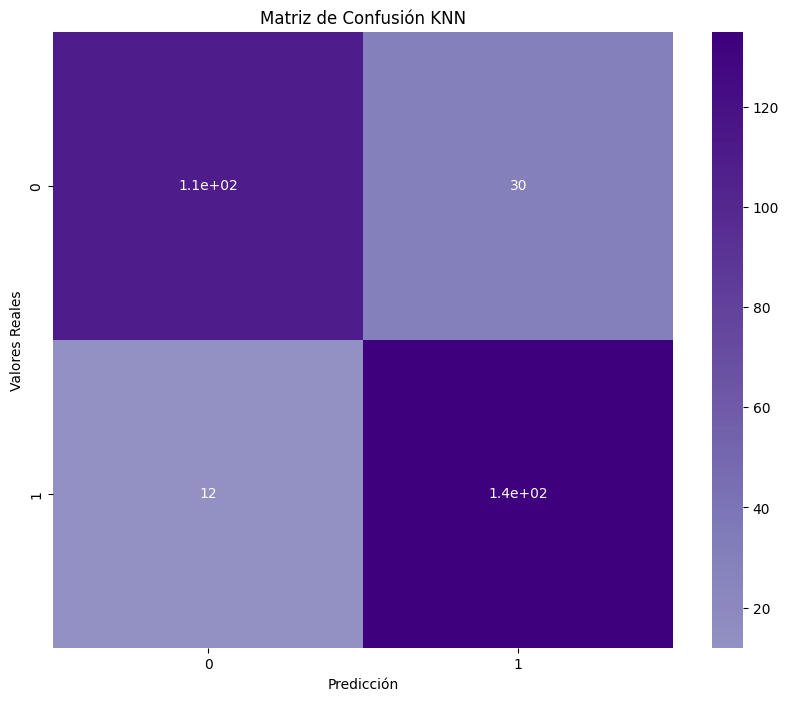

In [38]:
_, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
sns.heatmap(
    conf_matrix_knn,
    annot=True,
    cmap='Purples',
    center=0,
    ax=ax1,
)

ax1.set_xlabel("Predicción")
ax1.set_ylabel("Valores Reales")
ax1.set_xticks(ticks=ax1.get_xticks())
ax1.set_yticks(ticks=ax1.get_yticks())
plt.title("Matriz de Confusión KNN")
plt.show()

### Árbol de decisiones

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred_dt = pipeline_dt.predict(X_test)

classification_report_dt = classification_report(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Repote Clasificación Árbol de decisiones")
print(classification_report_dt)

Repote Clasificación Árbol de decisiones
              precision    recall  f1-score   support

       False       0.87      0.83      0.85       139
        True       0.85      0.88      0.87       147

    accuracy                           0.86       286
   macro avg       0.86      0.86      0.86       286
weighted avg       0.86      0.86      0.86       286



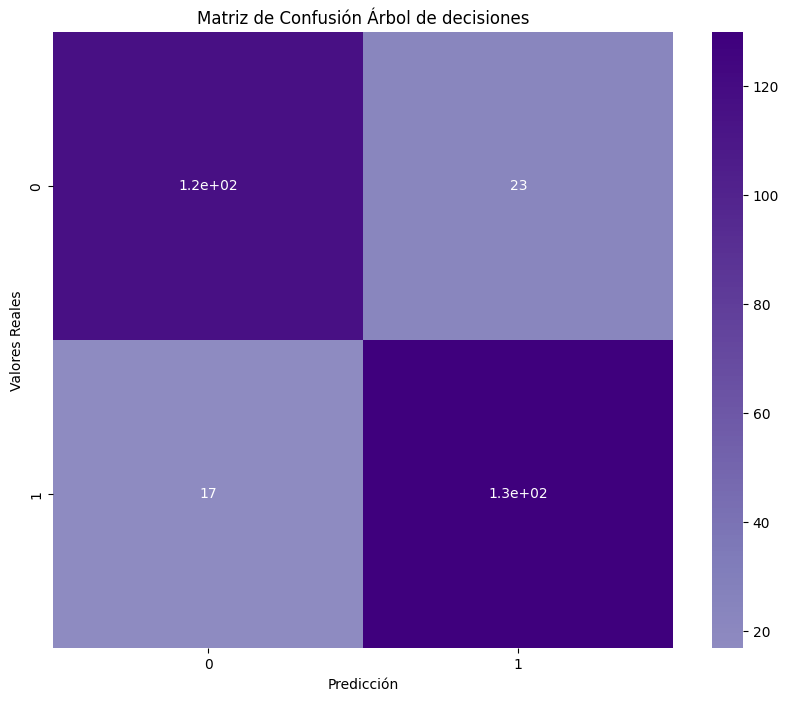

In [40]:
_, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
sns.heatmap(
    conf_matrix_dt,
    annot=True,
    cmap='Purples',
    center=0,
    ax=ax1,
)

ax1.set_xlabel("Predicción")
ax1.set_ylabel("Valores Reales")
ax1.set_xticks(ticks=ax1.get_xticks())
ax1.set_yticks(ticks=ax1.get_yticks())
plt.title("Matriz de Confusión Árbol de decisiones")
plt.show()

### Linear Regression

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred_lr = pipeline_lr.predict(X_test)

classification_report_lr = classification_report(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Repote Clasificación Regresión Lineal")
print(classification_report_lr)

Repote Clasificación Regresión Lineal
              precision    recall  f1-score   support

       False       0.86      0.75      0.80       139
        True       0.79      0.88      0.83       147

    accuracy                           0.82       286
   macro avg       0.82      0.82      0.82       286
weighted avg       0.82      0.82      0.82       286



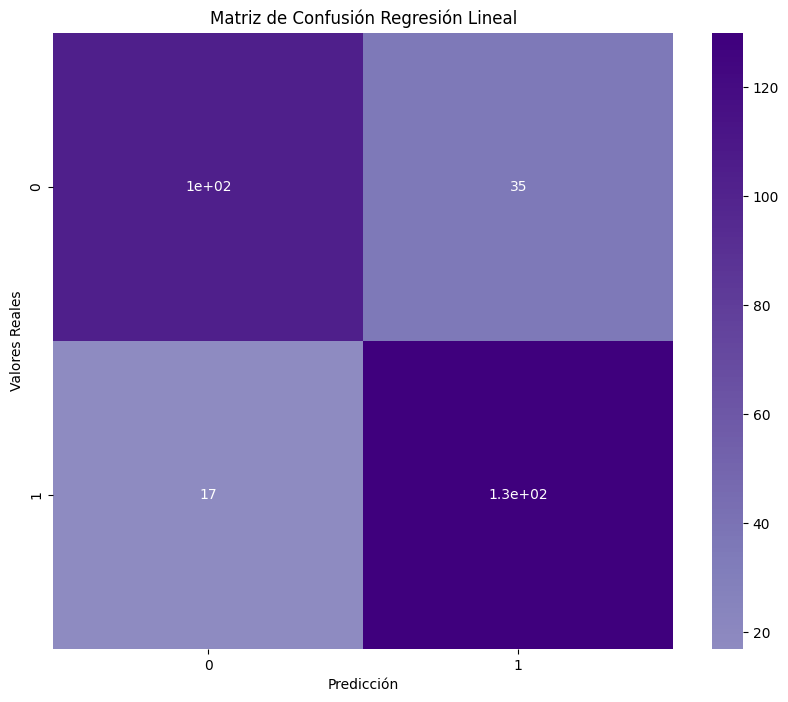

In [42]:
_, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
sns.heatmap(
    conf_matrix_lr,
    annot=True,
    cmap='Purples',
    center=0,
    ax=ax1,
)

ax1.set_xlabel("Predicción")
ax1.set_ylabel("Valores Reales")
ax1.set_xticks(ticks=ax1.get_xticks())
ax1.set_yticks(ticks=ax1.get_yticks())
plt.title("Matriz de Confusión Regresión Lineal")
plt.show()

### XBoost

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred_xb = pipeline_xb.predict(X_test)

classification_report_xb = classification_report(y_test, y_pred_xb)
conf_matrix_xb = confusion_matrix(y_test, y_pred_xb)
print("Repote Clasificación Árbol de XBoost")
print(classification_report_xb)

Repote Clasificación Árbol de XBoost
              precision    recall  f1-score   support

       False       0.92      0.86      0.89       139
        True       0.87      0.93      0.90       147

    accuracy                           0.90       286
   macro avg       0.90      0.89      0.89       286
weighted avg       0.90      0.90      0.89       286



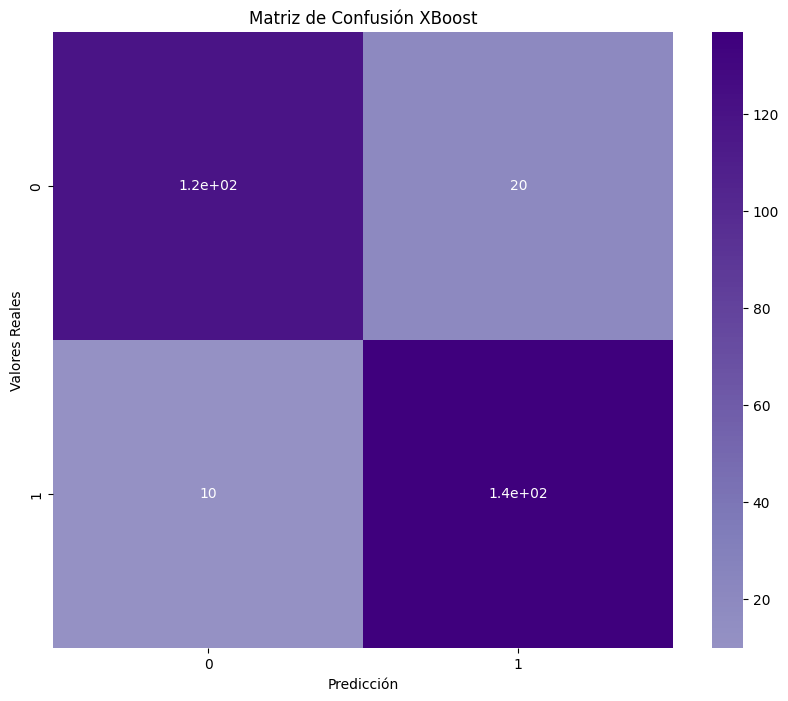

In [44]:
_, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
sns.heatmap(
    conf_matrix_xb,
    annot=True,
    cmap='Purples',
    center=0,
    ax=ax1,
)

ax1.set_xlabel("Predicción")
ax1.set_ylabel("Valores Reales")
ax1.set_xticks(ticks=ax1.get_xticks())
ax1.set_yticks(ticks=ax1.get_yticks())
plt.title("Matriz de Confusión XBoost")
plt.show()

Utilizamos Gridsearch para optimizar y luego evaluamos con validación cruzada

### LGBM GridSearch

In [45]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
}
pipeline_lgbm_gscv = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', GridSearchCV(
            lgb.LGBMClassifier(),
            param_grid= {
    'learning_rate': [0.1, 0.2],
    'n_estimators': [100, 200],
    'num_leaves': [20, 30],
},
            cv=5,
            refit=True,
            verbose=2,
            n_jobs=-1
        )),
    ]
)
pipeline_lgbm_gscv.fit(X_train, y_train)



Fitting 5 folds for each of 8 candidates, totalling 40 fits
[LightGBM] [Info] Number of positive: 286, number of negative: 247
[LightGBM] [Info] Number of positive: 286, number of negative: 247
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 774
[LightGBM] [Info] Number of data points in the train set: 533, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.536585 -> initscore=0.146603
[LightGBM] [Info] Start training from score 0.146603
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.052990 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 533, number of used features: 17
[LightGBM] [Info] [binary:B

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'resting.bp.s',
                                                   'cholesterol', 'resting.ecg',
                                                   'max.heart.rate', 'oldpeak',
                                                   'ST.slope']),
                                                 ('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['sex', 'chest.pain.type',
                                                   'fasting.blood.sugar',
                                                   'exercise.angina'])])),
                ('model',
                 GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
                              param_grid={'learning_rate': [0.1, 0.2],
                                          'n_estimators': [100, 200],
                                          'num_leaves': [20, 30]},
                              verbose=2))])

In [46]:
params = pipeline_lgbm_gscv.steps[-1][1].best_params_

params

{'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 20}

In [47]:
from sklearn.model_selection import cross_val_score
score_lgbm_gscv = cross_val_score(pipeline_lgbm_gscv, X_train, y_train, cv=5).mean()

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[LightGBM] [Info] Number of positive: 228, number of negative: 197
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 425, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.536471 -> initscore=0.146142
[LightGBM] [Info] Start training from score 0.146142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

In [48]:
print(f"Promedio score lgbm GridSearchCv: {score_lgbm_gscv}")

Promedio score lgbm GridSearchCv: 0.873886208057457


### KNN GridSearch

In [49]:
pipeline_knn_gscv = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', GridSearchCV(
            KNeighborsClassifier(),
            param_grid={
                'n_neighbors': list(range(1, 101)),
            },
            cv=5,
            refit=True,
            verbose=2,
        )),
    ]
)
pipeline_knn_gscv.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END .....................................

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'resting.bp.s',
                                                   'cholesterol', 'resting.ecg',
                                                   'max.heart.rate', 'oldpeak',
                                                   'ST.slope']),
                                                 ('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['sex', 'chest.pain.type',
                                                   'fasting.blood.sugar',
                                                   'exercise.angina'])])),
                ('model',
                 GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
                              param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7,
                                                          8, 9, 10, 11, 12, 13,
                                                          14, 15, 16, 17, 18,
                                                          19, 20, 21, 22, 23,
                                                          24, 25, 26, 27, 28,
                                                          29, 30, ...]},
                              verbose=2))])

In [50]:
params = pipeline_knn_gscv.steps[-1][1].best_params_

params

{'n_neighbors': 1}

In [51]:
from sklearn.model_selection import cross_val_score
score_knn_gscv = cross_val_score(pipeline_knn_gscv, X_train, y_train, cv=5).mean()

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END .....................................

In [52]:
print(f"Promedio score KNN GridSearchCv: {score_knn_gscv}")

Promedio score KNN GridSearchCv: 0.8498036135113903


### Arbol de decisiones GridSearch

In [53]:
pipeline_dt_gscv = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', GridSearchCV(
            DecisionTreeClassifier(),
            param_grid={
                'max_depth': list(range(1, 20)) + [None],
                'min_samples_split': list(range(2, 11)),
                'min_samples_leaf': list(range(1, 5)),
            },
            cv=5,
            refit=True,
            verbose=2,
        )),
    ]
)
pipeline_dt_gscv.fit(X_train, y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END max_depth=1, min_samples_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'resting.bp.s',
                                                   'cholesterol', 'resting.ecg',
                                                   'max.heart.rate', 'oldpeak',
                                                   'ST.slope']),
                                                 ('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['sex', 'chest.pain.type',
                                                   'fasting.blood.sugar',
                                                   'exercise.angina'])])),
                ('model',
                 GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                              param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19,
                                                        None],
                                          'min_samples_leaf': [1, 2, 3, 4],
                                          'min_samples_split': [2, 3, 4, 5, 6,
                                                                7, 8, 9, 10]},
                              verbose=2))])

In [54]:
params = pipeline_dt_gscv.steps[-1][1].best_params_

params

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [55]:
{'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}
score_dt_gscv = cross_val_score(pipeline_dt_gscv, X_train, y_train, cv=5).mean()

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END max_depth=1, min_samples_

In [56]:
print(f"Promedio score dt GridSearchCv: {score_dt_gscv}")

Promedio score dt GridSearchCv: 0.8258781281562115


### Regresión Logística GridSearch

In [57]:
from time import time
from sklearn.model_selection import GridSearchCV
pipeline_lr_gscv = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', GridSearchCV(
            LogisticRegression(
                max_iter=10000,            # Número máximo de iteraciones
                tol=1e-4,                # Tolerancia para el criterio de parada
                random_state=42 # Semilla para la reproducibilidad
            ),
            param_grid={
                'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
            },
            cv=5,
            refit=True,
            verbose=2,
        )),
    ]
)
pipeline_lr_gscv.fit(X_train, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s


[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ................................C=0.001, solver=sag; total time=   0.0s
[CV] END ................................C=0.001, solver=sag; total time=   0.0s
[CV] END ................................C=0.001, solver=sag; total time=   0.0s
[CV] END ................................C=0.001, solver=sag; total time=   0.0s
[CV] END ...................

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'resting.bp.s',
                                                   'cholesterol', 'resting.ecg',
                                                   'max.heart.rate', 'oldpeak',
                                                   'ST.slope']),
                                                 ('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['sex', 'chest.pain.type',
                                                   'fasting.blood.sugar',
                                                   'exercise.angina'])])),
                ('model',
                 GridSearchCV(cv=5,
                              estimator=LogisticRegression(max_iter=10000,
                                                           random_state=42),
                              param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                1000],
                                          'solver': ['newton-cg', 'lbfgs',
                                                     'liblinear', 'sag',
                                                     'saga']},
                              verbose=2))])

In [58]:
params = pipeline_lr_gscv.steps[-1][1].best_params_

params

{'C': 1, 'solver': 'liblinear'}

In [59]:
score_lr_gscv = cross_val_score(pipeline_lr_gscv, X_train, y_train, cv=5).mean()

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..........................C=0.001, solver=newton-cg; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=0.001, solver=lbfgs; total time=   0.0s
[CV] END ..........................C=0.001, solver=liblinear; total time=   0.0s
[CV] END ..........................C=0.001, sol

In [60]:
print(f"Promedio score Regresión Logística GridSearchCv: {score_lr_gscv}")

Promedio score Regresión Logística GridSearchCv: 0.8363034451801145


### XBOOST GridSearch

In [61]:
pipeline_xb_gscv = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", GridSearchCV(
        xgb.XGBClassifier(eval_metric='logloss', random_state=42),
        param_grid={
            "n_estimators": [100, 200, 300],
        },
        scoring = 'roc_auc',
        cv=5,
        verbose=2,
        refit=True,
    )),
])

pipeline_xb_gscv.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ...................................n_estimators=100; total time=   0.8s
[CV] END ...................................n_estimators=100; total time=   0.2s
[CV] END ...................................n_estimators=100; total time=   0.2s
[CV] END ...................................n_estimators=100; total time=   0.2s
[CV] END ...................................n_estimators=100; total time=   0.1s
[CV] END ...................................n_estimators=200; total time=   0.1s
[CV] END ...................................n_estimators=200; total time=   0.1s
[CV] END ...................................n_estimators=200; total time=   0.1s
[CV] END ...................................n_estimators=200; total time=   0.1s
[CV] END ...................................n_estimators=200; total time=   0.1s
[CV] END ...................................n_estimators=300; total time=   0.1s
[CV] END ...................................n_est

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'resting.bp.s',
                                                   'cholesterol', 'resting.ecg',
                                                   'max.heart.rate', 'oldpeak',
                                                   'ST.slope']),
                                                 ('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['sex', 'chest.pain...
                                                      learning_rate=None,
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...),
                              param_grid={'n_estimators': [100, 200, 300]},
                              scoring='roc_auc', verbose=2))])

In [62]:
params = pipeline_xb_gscv.steps[-1][1].best_params_

params

{'n_estimators': 200}

In [63]:
score_xb_gscv = cross_val_score(pipeline_xb_gscv, X_train, y_train, cv=5).mean()

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ...................................n_estimators=100; total time=   0.2s
[CV] END ...................................n_estimators=100; total time=   0.1s
[CV] END ...................................n_estimators=100; total time=   0.1s
[CV] END ...................................n_estimators=100; total time=   0.1s
[CV] END ...................................n_estimators=100; total time=   0.1s
[CV] END ...................................n_estimators=200; total time=   0.2s
[CV] END ...................................n_estimators=200; total time=   0.3s
[CV] END ...................................n_estimators=200; total time=   0.3s
[CV] END ...................................n_estimators=200; total time=   0.1s
[CV] END ...................................n_estimators=200; total time=   0.2s
[CV] END ...................................n_estimators=300; total time=   0.1s
[CV] END ...................................n_est

In [64]:
print(f"Promedio score XBOOST GridSearchCv: {score_xb_gscv}")

Promedio score XBOOST GridSearchCv: 0.9328720324177866


### Comparamos los rendimientos

In [65]:
y_pred_xb = pipeline_xb_gscv.predict(X_test)
classification_report_xb = classification_report(y_test, y_pred_xb)
conf_matrix_xb = confusion_matrix(y_test, y_pred_xb)

y_pred_lr = pipeline_lr_gscv.predict(X_test)
classification_report_lr = classification_report(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

y_pred_dt = pipeline_dt_gscv.predict(X_test)
classification_report_dt = classification_report(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

y_pred_knn = pipeline_knn_gscv.predict(X_test)
classification_report_knn = classification_report(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

y_pred_lgmb = pipeline_lgbm_gscv.predict(X_test)
classification_report_lgmb = classification_report(y_test, y_pred_lgmb)
conf_matrix_lgmb = confusion_matrix(y_test, y_pred_lgbm)

Graficamos las matrices confusión

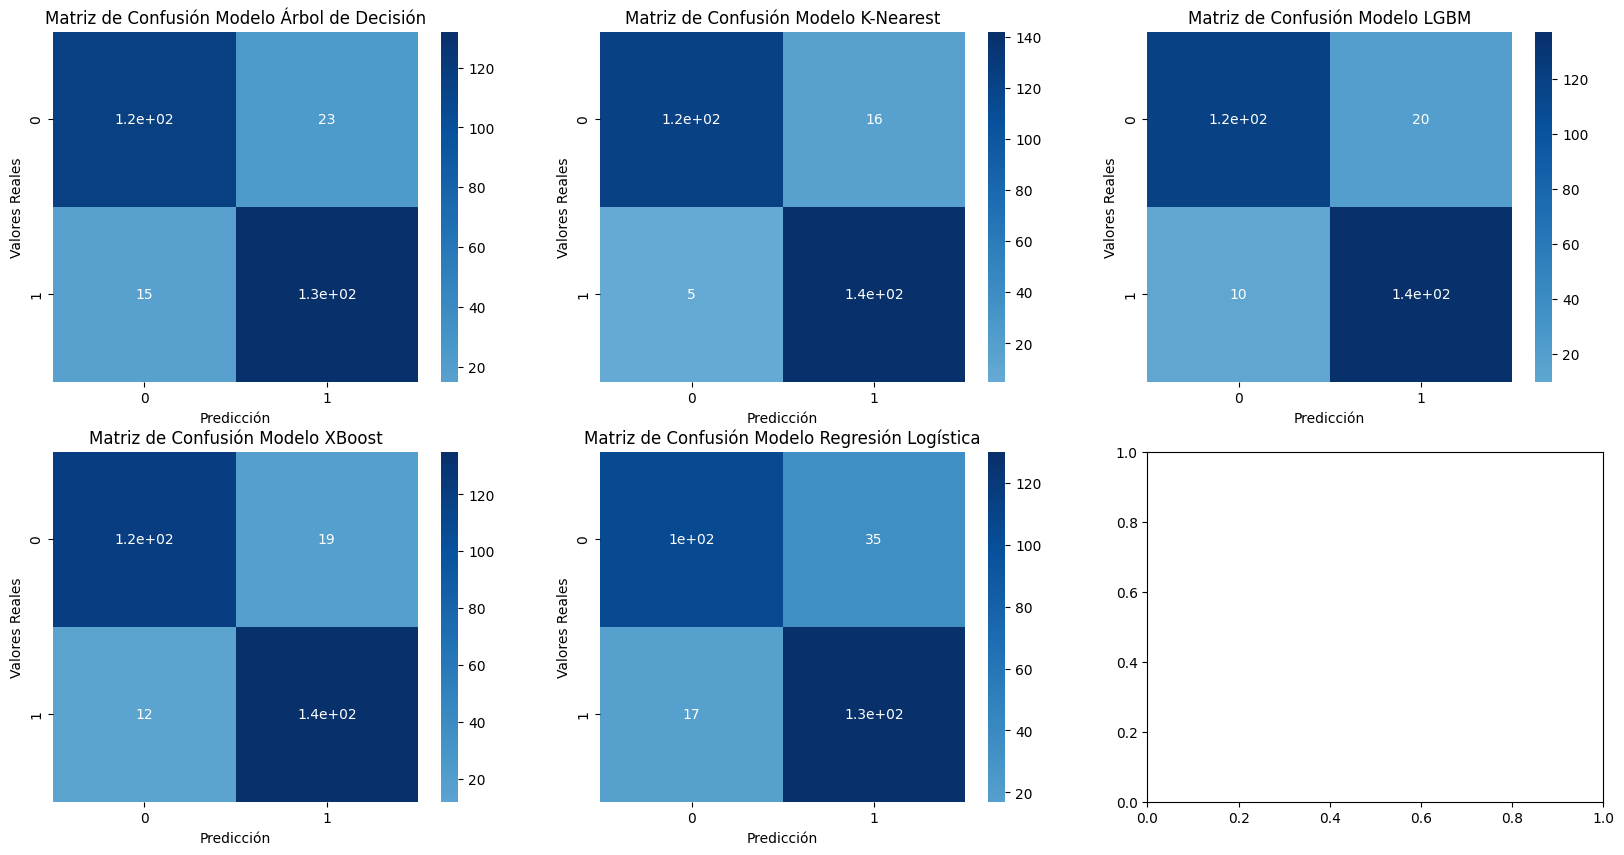

In [68]:
from utils import graph_confusion_matrixes
conf_matrix = [conf_matrix_dt, conf_matrix_knn, conf_matrix_lgmb, conf_matrix_xb, conf_matrix_lr]
graph_confusion_matrixes(conf_matrix, figsize=(20, 10), confusion_matrix_names=["Modelo Árbol de Decisión", "Modelo K-Nearest", "Modelo LGBM", "Modelo XBoost", "Modelo Regresión Logística"])

Ahora evaluaremos los valores Presición, F1-Score, Recall y 

In [69]:
# El siguiente fragmento de codigo fue obtenido a traves de ChatGPT, 
# basicamente lo que hace es imprimir en 2 columnas, se utiliza solamente 
# para facil visualizacion de ambas tablas
table1 = classification_report_lgbm
table2 = classification_report_xb
table3 = classification_report_knn
table4 = classification_report_lr
table5 = classification_report_dt
table2 = "Modelo LGBM\n" + table2[0:]
table1 = "Modelo XBoost\n" + table1[0:]
table3 = "Modelo K-Nearest\n" + table3[0:]
table4 = "Modelo Regresion Logistica\n" + table4[0:]
table5 = "Modelo Árbol de decisión\n" + table5[0:]
# Split the tables into lines
lines1 = table1.split("\n")
lines2 = table2.split("\n")
lines3 = table3.split("\n")
lines4 = table4.split("\n")
lines5 = table5.split("\n")
# Pad the shorter list to match the length of the longer one
max_lines = max(len(lines1), len(lines2), len(lines3))
lines1.extend([""] * (max_lines - len(lines1)))
lines2.extend([""] * (max_lines - len(lines2)))
lines3.extend([""] * (max_lines - len(lines3)))
# Print the tables side by side
for line1, line2, line3 in zip(lines1, lines2, lines3):
    print(f"{line1:<50} {"       "} {line2:<50} {"       "} {line3}")
max_lines = max(len(lines3), len(lines4))
lines4.extend([""] * (max_lines - len(lines4)))
lines5.extend([""] * (max_lines - len(lines5)))
for line4, line5 in zip(lines4, lines5):
    print(f"{line4:<50} {"       "} {line5}")

Modelo XBoost                                              Modelo LGBM                                                Modelo K-Nearest
              precision    recall  f1-score   support                       precision    recall  f1-score   support                       precision    recall  f1-score   support
                                                                                                                      
       False       0.92      0.86      0.89       139                False       0.91      0.86      0.89       139                False       0.96      0.88      0.92       139
        True       0.87      0.93      0.90       147                 True       0.88      0.92      0.90       147                 True       0.90      0.97      0.93       147
                                                                                                                      
    accuracy                           0.90       286             accuracy                   

El mejor modelo según las métricas presentadas es K-Nearest Neighbors (KNN), ya que tiene los valores más altos en precisión, recall, f1-score, y accuracy:

- Accuracy: 0.93 (el más alto entre todos los modelos).
- Macro avg y Weighted avg: 0.93 en precisión, recall y f1-score.

Aunque otros modelos, como XGBoost y LGBM, tienen resultados competitivos, KNN es claramente superior en estas métricas. Si buscas un modelo más equilibrado y con mejor rendimiento, KNN sería la mejor opción.